# 📈⏳ Gold Price Analysis: Unraveling Trends & Predictions 📉💰

In this project, we delve into the captivating world of gold prices, spanning from January 19, 2014, to January 22, 2024. Our mission? Uncover hidden patterns, forecast future trends, and craft robust trading strategies.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Data Loading 📊📥:

* Load the comprehensive dataset containing daily gold prices.
* Handle missing values and format the date column.
* Explore basic statistics and distributions of the data.
* Prepare the data for visualization and modeling.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/goldstock.csv')
data.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [ ]:
data = data.drop('Unnamed: 0',axis=1)
data

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [ ]:
# Check for null values in the 'narrative' column
null = data.isnull()

# Print the number of null narratives
num_null = null.sum()
print(f"Number of null: \n{num_null}")

Number of null: 
Date      0
Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64


In [ ]:
data['Date']=pd.to_datetime(data['Date'])

In [ ]:
data

,Date,Close,Volume,Open,High,Low
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8


In [ ]:
data.describe()

,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,298.824811,97600.769382,299.118187,301.262244,296.417703
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


## Visualization 📊👀:

* Plot time series graphs of gold prices over the specified time period.
* Visualize volume trends and compare with price movements.
* Identify seasonality and long-term trends through visual inspection.

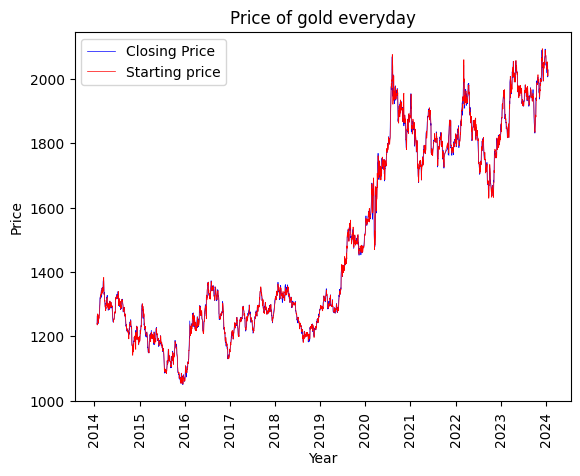

In [ ]:
plt.title('Price of gold everyday')
sns.lineplot(x=data['Date'], y=data.Close, label='Closing Price', linewidth=0.5, color='blue')
sns.lineplot(x=data['Date'], y=data.Open,label='Starting price',linewidth=0.5,color='red')
plt.xlabel("Year")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.show()

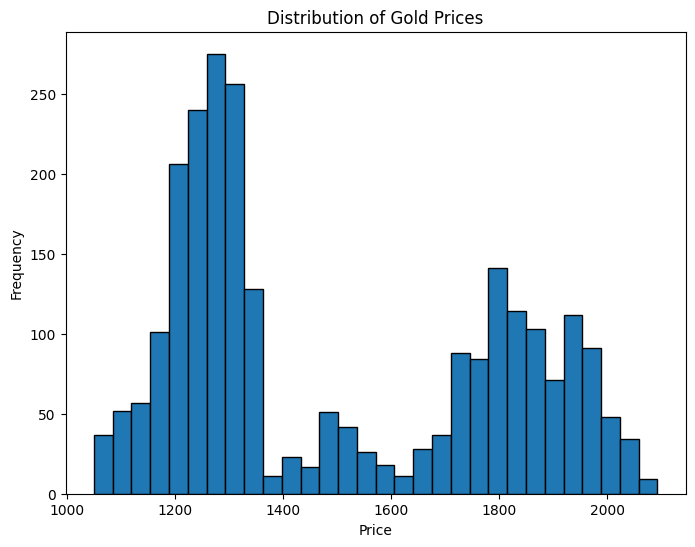

<ipython-input-27-a76bbf00c575>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Close'], shade=True)


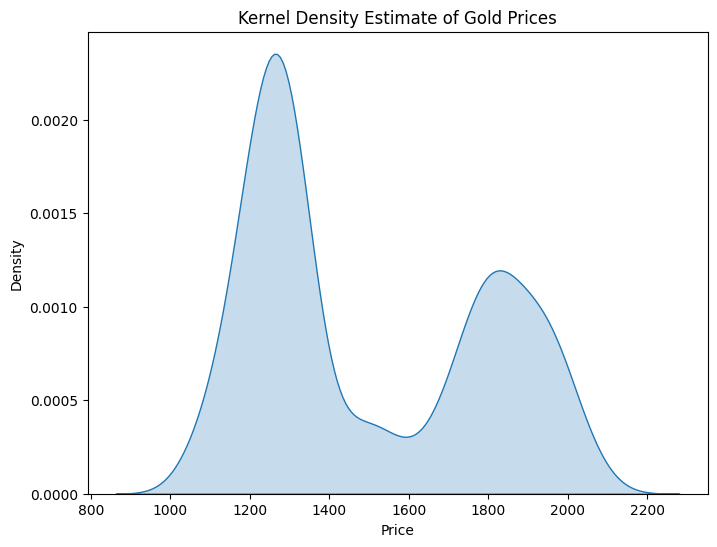

In [ ]:
# Histogram of gold prices
plt.figure(figsize=(8, 6))
plt.hist(data['Close'], bins=30, edgecolor='black')
plt.title('Distribution of Gold Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Kernel Density Estimate (KDE) plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Close'], shade=True)
plt.title('Kernel Density Estimate of Gold Prices')
plt.xlabel('Price')
plt.show()

In [ ]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-28-03c1d14ddfb1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


## Data Processing 🛠️ :

In this section, we preprocess the dataset to prepare it for analysis and modeling:

1. **Convert Date to Datetime**: We convert the `Date` column to datetime objects using Pandas `to_datetime` function, ensuring proper handling of date-related operations.

2. **Create Datetime Feature**: A new feature named `Datetime` is created to represent the date information extracted from the `Date` column.

3. **One-hot Encode Datetime Feature**: The `Datetime` feature is one-hot encoded using Pandas `get_dummies` function, transforming categorical date information into numerical format for machine learning algorithms. Prefix `datetime` is added to the generated columns for clarity.

4. **Time-based Features**: Additional time-based features are extracted from the `Date` column, including the day of the week, month, year, day of the month, and day of the year. These features provide insights into temporal variations in gold prices.

These preprocessing steps lay the groundwork for further analysis and modeling of gold price data.


In [ ]:
# Convert the Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create a datetime feature
data['Datetime'] = data['Date']

# One-hot encode the datetime feature
datetime_encoded = pd.get_dummies(data['Datetime'], prefix='datetime')
data = pd.concat([data, datetime_encoded], axis=1)
data.drop('Datetime', axis=1, inplace=True)

# Time-based features
data['Day of Week'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data['Day of Month'] = data['Date'].dt.day
data['Day of Year'] = data['Date'].dt.dayofyear

## Model Training 🤖📈:

**1. Data Splitting**: Split the dataset into training and testing sets for model evaluation.


In [ ]:
# Split the data into features (X) and target (y)
X = data[['Month', 'Year', 'Day of Month', 'Day of Year','Volume']]  # Replace with relevant features
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Print a single row
print(X.iloc[0])

Month                1.0
Year              2024.0
Day of Month        19.0
Day of Year         19.0
Volume          166078.0
Name: 0, dtype: float64


Function to visualize Predict vs Actual data 👇:

In [ ]:
dates_from_y_test = data.iloc[y_test.index]['Date'].values
dates_from_y_train= data.iloc[y_train.index]['Date'].values

def validate_result(model, model_name):
    predicted = model.predict(X_test)
    RSME_score = np.sqrt(mean_squared_error(y_test, predicted))
    print('RMSE: ', RSME_score)

    R2_score = r2_score(y_test, predicted)
    print('R2 score: ', R2_score)

    sorted_dates_test, sorted_y_test = zip(*sorted(zip(dates_from_y_test, y_test), key=lambda x: x[0]))
    sorted_dates_test, sorted_predicted= zip(*sorted(zip(dates_from_y_test, predicted), key=lambda x: x[0]))

    plt.plot(sorted_dates_test, sorted_y_test, c='r', label='Actual')
    plt.plot(sorted_dates_test, sorted_predicted, c='b', label='Predict')
    # plt.scatter(dates_from_y_test, predicted, s=10, c='r', label='Predict')
    # plt.scatter(dates_from_y_test, y_test, s=10, c='b', label='Actual')
    plt.ylabel('Price')
    plt.title(model_name + ' Predict vs Actual')
    plt.legend(loc='upper right')
    plt.show()

**2. Algorithm Selection**:
* Choose appropriate forecasting algorithms such as `LinearRegression`, `GradientBoostingRegressor`, `RandomForestRegressor`, etc., for training.

**3. Model Training**:

* Train and fine-tune the selected models using historical gold price

**4. Performance Evaluation**:
* Evaluate model performance using relevant metrics to assess forecasting accuracy.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Model Selection and Training
model = LinearRegression()
model1 = model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
accuracy = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Accuracy (R-squared): {accuracy:.2f}')


Mean Absolute Error: 105.99
Root Mean Squared Error: 133.02
Accuracy (R-squared): 0.80


RMSE:  133.01535813736865
R2 score:  0.8007880125665255


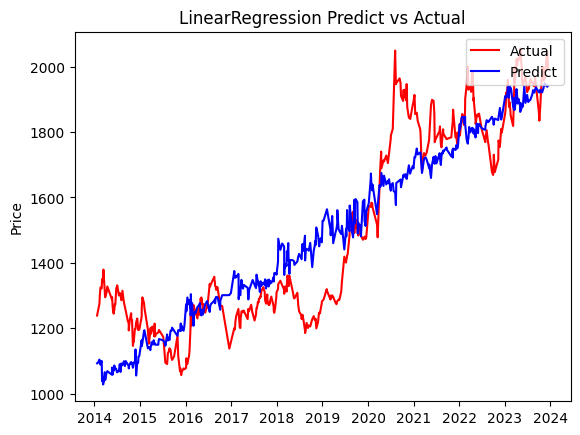

In [ ]:
validate_result(model1, 'LinearRegression')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)
model2 = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
accuracy = r2_score(y_test, y_pred)
print('Gradient Boosting Regression:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Accuracy (R-squared): {accuracy:.2f}')

Gradient Boosting Regression:
Mean Absolute Error: 37.63
Root Mean Squared Error: 51.45
Accuracy (R-squared): 0.97


RMSE:  51.452661398752234
R2 score:  0.970192360900156


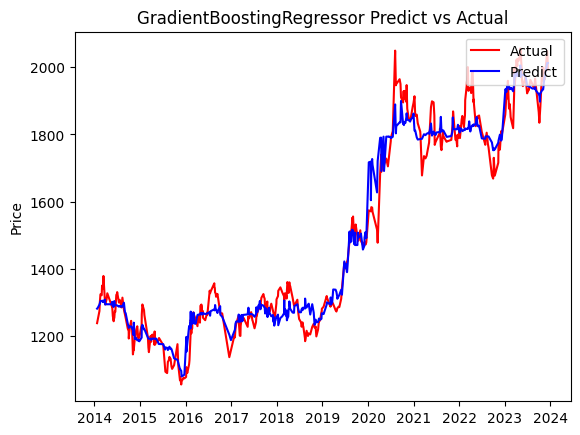

In [ ]:
validate_result(model2, 'GradientBoostingRegressor')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
accuracy = r2_score(y_test, y_pred)
print('Random Forest Regression:')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Accuracy (R-squared): {accuracy:.2f}')

Random Forest Regression:
Mean Absolute Error: 12.26
Root Mean Squared Error: 23.86
Accuracy (R-squared): 0.99


RMSE:  23.864634100307306
R2 score:  0.9935875874996871


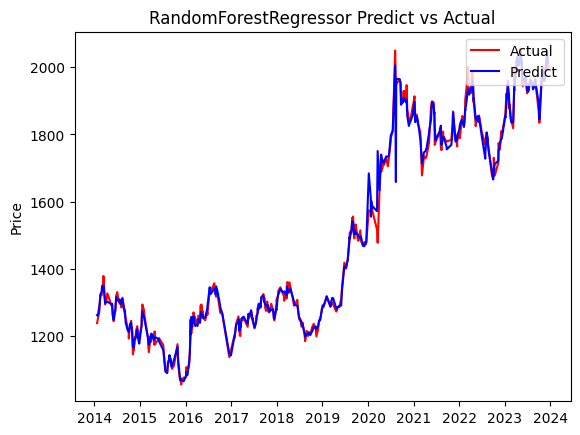

In [ ]:
validate_result(model3, 'RandomForestRegressor')

In [ ]:
custom_X = pd.DataFrame({
    'Month': [3, 6, 9],
    'Year': [2024, 2024, 2024],
    'Day of Month': [13, 20, 25],
    'Day of Year': [75, 172, 269],
    'Volume': [144267, 220000, 190000]
})

In [ ]:
# Model Evaluation
custom_y_pred = model3.predict(custom_X)
print('Predicted Gold Prices for Custom X Values:')
print(custom_y_pred)

Predicted Gold Prices for Custom X Values:
[2031.649 2014.558 2015.57 ]
